#**Cetral Limit Theorem**
Dalam teori probabilitas, teorema batas pusat (CLT) menyatakan bahwa distribusi variabel sampel mendekati distribusi normal (yaitu, "kurva lonceng") saat ukuran sampel menjadi lebih besar, terlepas dari bentuk distribusi populasi yang sebenarnya.

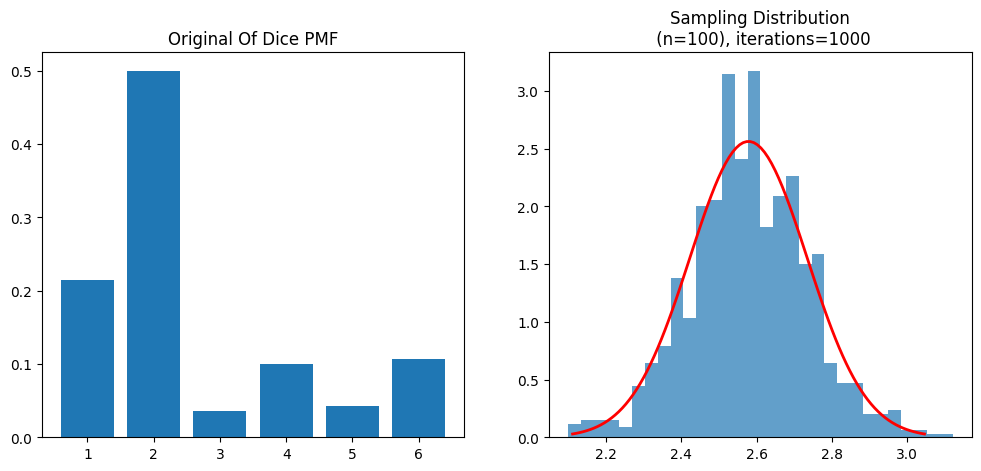

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def demonstrate_clt(dice_pmf, sample_size, num_interations):
  faces, probs = zip(*sorted(dice_pmf.items()))
  probs = np.array(probs) / sum(probs)
  sample_means = [np.random.choice(faces, size=sample_size, p=probs).mean()
                  for _ in range(num_interations)]
  fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))
  ax1.bar(faces,probs)
  ax1.set_title("Original Of Dice PMF")
  ax2.hist(sample_means, bins=30, density=True, alpha=0.7)
  ax2.set_title(f'Sampling Distribution\n (n={sample_size}), iterations={num_interations}')

  mu, std = np.mean(sample_means), np.std(sample_means)
  x = np.linspace(mu - 3*std, mu + 3*std, 100)
  ax2.plot(x, stats.norm.pdf(x, mu, std), 'r-', linewidth=2)
  plt.show()

dice_pmf = {1:3/6,
            2:7/6,
            3:0.5/6,
            4:1.4/6,
            5:0.6/6,
            6:1.5/6}

demonstrate_clt(dice_pmf, sample_size=100, num_interations=1000)